<a href="https://colab.research.google.com/github/Sarinda251/CAP_4630/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import statistics
import numpy as np
from numpy.random import seed
from numpy.random import randn
import matplotlib.pyplot as plt
seed(1)

#Task 1

##Preprocess Data

In [234]:
df = pd.read_csv('football.csv')
print(df.columns)
print(df.info())

Index(['ID', 'Date', 'Opponent', 'Is_Home_or_Away',
       'Is_Opponent_in_AP25_Preseason', 'Media', 'Label'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID                             36 non-null     int64 
 1   Date                           36 non-null     object
 2   Opponent                       36 non-null     object
 3   Is_Home_or_Away                36 non-null     object
 4   Is_Opponent_in_AP25_Preseason  36 non-null     object
 5   Media                          36 non-null     object
 6   Label                          36 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.1+ KB
None


In [235]:
dataClean = {
  "1-NBC": 0,
  "2-ESPN": 1,
  "3-FOX": 2,
  "4-ABC": 3,
  "5-CBS": 4,
  "Home": 0,
  "Away": 1,
  "In": 0,
  "Out": 1,
  "Win": 1,
  "Lose": 0
}
df['Media'] = df['Media'].transform(lambda x: dataClean[x])
df['Is_Home_or_Away'] = df['Is_Home_or_Away'].transform(lambda x: dataClean[x])
df['Is_Opponent_in_AP25_Preseason'] = df['Is_Opponent_in_AP25_Preseason'].transform(lambda x: dataClean[x])
df['Label'] = df['Label'].transform(lambda x: dataClean[x])

In [236]:
train_x = df[['Is_Home_or_Away', 'Is_Opponent_in_AP25_Preseason', 'Media']][:24]
train_y = df[['Label']][:24]
test_x = df[['Is_Home_or_Away', 'Is_Opponent_in_AP25_Preseason', 'Media']][24:]
test_y = df[['Label']][24:]


##Naive Bayes

In [237]:
gnb = GaussianNB()
pred_y = gnb.fit(train_x, train_y).predict(test_x)
print(pred_y)

#print(test_y)

[1 0 1 1 1 0 0 1 1 0 1 0]


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [238]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(test_y)):
  if pred_y[i] == 1:
    if test_y.iloc[ i , : ][0] == pred_y[i]:
      TP += 1
    else:
      FP += 1
  else:
    if test_y.iloc[ i , : ][0] == pred_y[i]:
      TN += 1
    else:
      FN += 1

Accuracy = (TP+TN)/(TP+FP+FN+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2*(Recall * Precision) / (Recall + Precision)
print("Accuracy: " + str(Accuracy))
print("Precision: " + str(Precision))
print("Recall: " + str(Recall))
print("F1: " + str(F1))

Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.7777777777777778
F1: 0.8750000000000001


##KNN

In [239]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_x, train_y)
pred_y2 = knn.predict(test_x)
print(pred_y2)

[1 0 1 1 1 1 0 1 1 0 1 0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [240]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(test_y)):
  if pred_y[i] == 1:
    if test_y.iloc[ i , : ][0] == pred_y2[i]:
      TP += 1
    else:
      FP += 1
  else:
    if test_y.iloc[ i , : ][0] == pred_y2[i]:
      TN += 1
    else:
      FN += 1

Accuracy = (TP+TN)/(TP+FP+FN+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2*(Recall * Precision) / (Recall + Precision)
print("Accuracy: " + str(Accuracy))
print("Precision: " + str(Precision))
print("Recall: " + str(Recall))
print("F1: " + str(F1))

Accuracy: 0.9166666666666666
Precision: 1.0
Recall: 0.875
F1: 0.9333333333333333


#Task 2

## Preprocess Data

In [241]:
train_df = pd.read_csv('train.csv')
print(train_df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [242]:
sexToGender = {
  "male": 0,
  "female": 1
}

def embClean(x):
  if str(x) == 'nan':
    return 'S'
  return x

def fareClean(x, m):
  if str(x) == 'nan':
    return m
  return x

def fareBand(x):
  if x <= 7.91:
    return 0
  if x <= 14.454:
    return 1
  if x <= 31:
    return 2
  if x <= 512.329:
    return 3
  return 4

embBand = {
    "S": 0,
    "C": 1,
    "Q": 2
}

def ageClean(x, s, a):
  if str(x) == 'nan':
    return max(float(s*randn(1) + a),0)
  return float(x)

cleanedFare  = [x for x in train_df['Fare'].values if str(x) != 'nan']
mode = statistics.mode(cleanedFare)
cleanedAge = [x for x in train_df['Age'].values if str(x) != 'nan']
avg = statistics.mean(cleanedAge)
std = statistics.stdev(cleanedAge)

train_df['Age'] = train_df['Age'].transform(lambda x: ageClean(x, std, avg))
train_df['Fare'] = train_df['Fare'].transform(lambda x: fareClean(x, mode))
train_df['Fare'] = train_df['Fare'].transform(lambda x: fareBand(x))
train_df['Embarked'] = train_df['Embarked'].transform(lambda x: embClean(x))
train_df['Embarked'] = train_df['Embarked'].transform(lambda x: embBand[x])
train_df['Gender'] = train_df['Sex'].transform(lambda x: sexToGender[x])
train_df = train_df.drop(columns=["Ticket", "Cabin", "Name", "Sex"])

In [243]:
train_df._get_numeric_data()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,1,0,3,22.000000,1,0,0,0,0
1,2,1,1,38.000000,1,0,3,1,1
2,3,1,3,26.000000,0,0,1,0,1
3,4,1,1,35.000000,1,0,3,0,1
4,5,0,3,35.000000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,1,0,0
887,888,1,1,19.000000,0,0,2,0,1
888,889,0,3,49.040526,1,2,2,0,1
889,890,1,1,26.000000,0,0,2,1,0


In [244]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    int64  
 7   Embarked     891 non-null    int64  
 8   Gender       891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB


all null values have been filled, and columns have been turned into numerical datatypes.

In [245]:
train_x = train_df.drop(columns=["PassengerId", "Survived"])
train_y = train_df["Survived"]

In [246]:
train_x.describe()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.933108,0.523008,0.381594,1.508418,0.361392,0.352413
std,0.836071,14.286985,1.102743,0.806057,1.124141,0.635673,0.477990
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.869353,0.000000,0.000000,0.500000,0.000000,0.000000
50%,3.000000,29.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,3.000000,38.841008,1.000000,0.000000,2.000000,1.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,4.000000,2.000000,1.000000


In [247]:
train_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Naive Bayes

In [248]:
train_x = train_x[["Fare", "Pclass", "Gender", "Age"]]
train_x

,Fare,Pclass,Gender,Age
0,0,3,0,22.000000
1,3,1,1,38.000000
2,1,3,1,26.000000
3,3,1,1,35.000000
4,1,3,0,35.000000
...,...,...,...,...
886,1,2,0,27.000000
887,2,1,1,19.000000
888,2,3,1,49.040526
889,2,1,0,26.000000


In [249]:
gnb = GaussianNB()
clf = gnb.fit(train_x, train_y)

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

results = cross_validate(clf, train_x, train_y, cv=5, scoring=scoring)
print("Accuracy: " + str(statistics.mean(results['test_accuracy'])))
print("Precision: " + str(statistics.mean(results['test_precision'])))
print("Recall: " + str(statistics.mean(results['test_recall'])))
print("F1: " + str(statistics.mean(results['test_f1_score'])))

Accuracy: 0.746425208712573
Precision: 0.6508873278620114
Recall: 0.7370843989769821
F1: 0.6907574561629913


##KNN

In [250]:
train_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [251]:
def euclideanDistance(p1, p2):
  distance = 0
  for i in range(len(p1)):
    distance += pow((p1[i] - p2[i]), 2)
  return np.sqrt(distance)

def getDists(train_x, item):
  distances = []
  length = len(item)-1
  for i in range(len(train_x)):
    dist = euclideanDistance(item, train_x.iloc[ i , : ])
    distances.append((dist, i))
  distances.sort()
  return distances

def getNeighbors(train_x, item, k, distances):
  neighbors = []
  for i in range(k):
    neighbors.append(distances[i+1][1])
  return neighbors

def getResponse(train_y, neighbors):
  responses = [0,0]
  for x in range(len(neighbors)):
    response = train_y.iloc[neighbors[x]]
    responses[response] += 1
  if responses[0] > responses[1]:
    return 0
  return 1

def getAccuracy(test_y, pred):
	correct = 0
	for i in range(len(test_y)):
		if train_y.iloc[i] == pred[i]: 
			correct = correct + 1
			
	return (correct/float(len(test_y))*100) 

In [252]:

train_x2, test_x2, train_y2, test_y2 = train_test_split(train_x, train_y, test_size = .20)
train_y2

231    0
345    1
541    0
60     0
640    0
      ..
365    0
856    1
441    0
681    1
565    0
Name: Survived, Length: 712, dtype: int64

In [253]:
train_y2.iloc[3]

0

In [254]:
k_acc = []
pred = []
distances = []
for i in range(len(test_x2)):
  distances.append(getDists(train_x2, test_x2.iloc[ i , : ]))

In [255]:
print(distances[0][0])

(0.0, 179)


In [256]:
for k in range(5, len(train_x2) - 2, 5):
  pred = []
  for i in range(len(test_x2)):    
    neighbors = getNeighbors(train_x2, test_x2.iloc[ i , : ], k, distances[i])
    #print(neighbors)
    #print("-----")
    result = getResponse(train_y2, neighbors)
    pred.append(result)
  accuracy = getAccuracy(test_y2, pred)
  print((k), accuracy)
  #print(str(k) + " done")
  k_acc.append(((k+1), accuracy))


5 54.7486033519553
10 50.83798882681564
15 54.7486033519553
20 53.072625698324025
25 54.18994413407822
30 54.7486033519553
35 58.10055865921788
40 56.424581005586596
45 59.217877094972074
50 58.10055865921788
55 62.56983240223464
60 62.01117318435754
65 63.687150837988824
70 63.128491620111724
75 65.36312849162012
80 65.92178770949721
85 65.36312849162012
90 65.36312849162012
95 66.4804469273743
100 66.4804469273743
105 67.0391061452514
110 67.0391061452514
115 68.71508379888269
120 67.0391061452514
125 67.0391061452514
130 67.0391061452514
135 67.0391061452514
140 67.0391061452514
145 67.0391061452514
150 67.0391061452514
155 67.0391061452514
160 67.0391061452514
165 67.0391061452514
170 67.0391061452514
175 67.0391061452514
180 67.0391061452514
185 67.0391061452514
190 67.0391061452514
195 67.0391061452514
200 67.0391061452514
205 67.0391061452514
210 67.0391061452514
215 67.0391061452514
220 67.0391061452514
225 67.0391061452514
230 67.0391061452514
235 67.0391061452514
240 67.03910

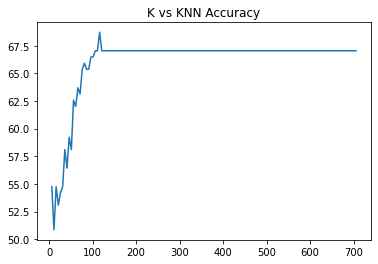

In [261]:
X = [x[0] for x in k_acc]
Y = [x[1] for x in k_acc]
plt.plot(X, Y)
plt.title("K vs KNN Accuracy")
plt.show()

In [269]:
k_acc = []
pred = []
distances = []
for i in range(len(train_x)):
  distances.append(getDists(train_x, train_x.iloc[ i , : ]))



In [270]:
len(distances)

891

5 76.0942760942761
10 76.20650953984287
15 73.73737373737373
20 72.72727272727273
25 71.8294051627385
30 70.93153759820426
35 70.03367003367003
40 69.24803591470258
45 69.1358024691358
50 69.36026936026936
55 68.91133557800224
60 67.78900112233445
65 66.77890011223344
70 67.45230078563412
75 65.54433221099887
80 66.55443322109988
85 65.54433221099887
90 65.4320987654321
95 64.98316498316498
100 65.65656565656566
105 65.09539842873177
110 63.52413019079685
115 62.62626262626263
120 61.05499438832772
125 61.84062850729517
130 62.2895622895623
135 60.71829405162739
140 61.61616161616161
145 61.61616161616161
150 61.39169472502806
155 61.61616161616161
160 61.61616161616161
165 61.61616161616161
170 61.61616161616161
175 61.61616161616161
180 61.61616161616161
185 61.61616161616161
190 61.61616161616161
195 61.61616161616161
200 61.61616161616161
205 61.61616161616161
210 61.61616161616161
215 61.61616161616161
220 61.61616161616161
225 61.61616161616161
230 61.61616161616161
235 61.616161

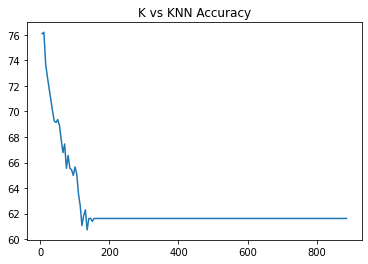

In [271]:
for k in range(5, len(train_x) - 2, 5):
  pred = []
  for i in range(len(distances)):    
    neighbors = getNeighbors(train_x, train_x.iloc[ i , : ], k, distances[i])
    #print(neighbors)
    #print("-----")
    result = getResponse(train_y, neighbors)
    pred.append(result)
  accuracy = getAccuracy(train_y, pred)
  print((k), accuracy)
  #print(str(k) + " done")
  k_acc.append(((k+1), accuracy))

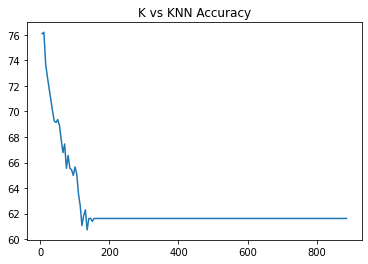

In [272]:
X = [x[0] for x in k_acc]
Y = [x[1] for x in k_acc]
plt.plot(X, Y)
plt.title("K vs KNN Accuracy")
plt.show()